In [7]:
#install the opencv
!pip install opencv-python

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [33]:
#如果需要使用Tesseract进行OCR（光学字符识别），也需要安装Tesseract及其Python库pytesseract
!sudo apt-get install tesseract-ocr  
!pip install pytesseract

'sudo' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
#使用OpenCV加载图像：
import cv2  
import pytesseract
from matplotlib import pyplot as plt 
import numpy as np  

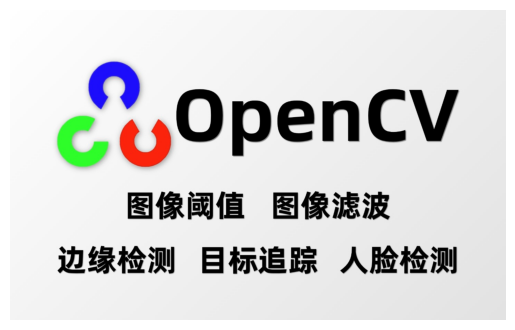

In [16]:
image_path = './5ef5679fdfd1bf46f36d1fce011e3c836deed62e.png' 
image = cv2.imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

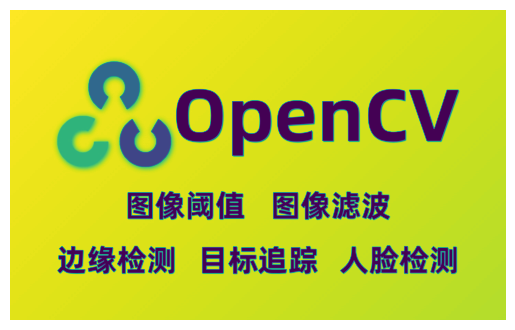

In [19]:
#image preprocessing
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)
plt.axis('off')
plt.show()

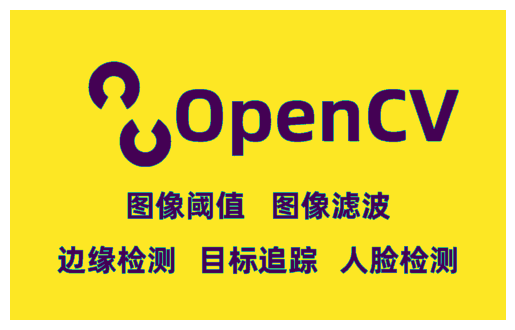

In [21]:
# 阈值处理  
_, thresh_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY) 
plt.imshow(thresh_image)
plt.axis('off')
plt.show()

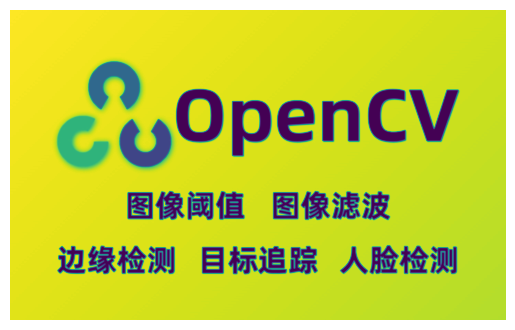

In [22]:
# 模糊处理  
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
plt.imshow(blurred_image)
plt.axis('off')
plt.show()

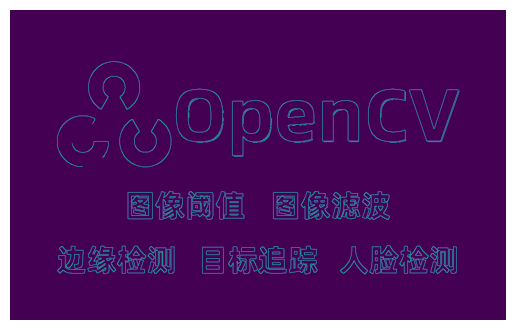

In [23]:
# 边缘检测  
edges = cv2.Canny(gray_image, 50, 150)  
plt.imshow(edges)
plt.axis('off')
plt.show()  

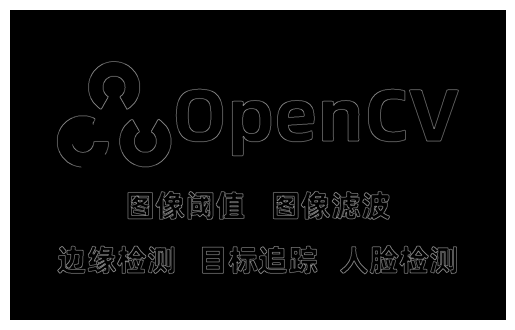

In [25]:
# 边缘检测  
edges = cv2.Canny(blurred_image, 50, 150)  
plt.imshow(edges, cmap='gray')  
plt.axis('off')  
plt.show() 

In [26]:
# 轮廓检测  
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  

In [92]:
 
# 筛选可能是文本的轮廓（基于面积、长宽比等）  
# 这里我们简单设置一些阈值，实际情况可能需要调整  
min_area = 0 # 最小面积  
max_area = 5000000  # 最大面积  
aspect_ratio_threshold = 5.0  # 长宽比阈值 
text_contours = []  
for contour in contours:  
    area = cv2.contourArea(contour)  
    if min_area < area < max_area:  
        # 计算轮廓的边界框  
        x, y, w, h = cv2.boundingRect(contour)  
        aspect_ratio = w / h  
        if 0.5 < aspect_ratio < aspect_ratio_threshold:  
            text_contours.append(contour)  

In [93]:
# 在原图上绘制文本轮廓  
output_image = image.copy()  
cv2.drawContours(output_image, text_contours, -1, (0, 255, 0), 2)  # 使用绿色绘制轮廓，线宽为2  

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       ...,

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]],

       [[244, 244, 244],
        [244, 244, 244],
        [244, 244, 244],
        ...,
        [226, 226, 226],
        [226, 226, 226],
        [226, 226, 226]]

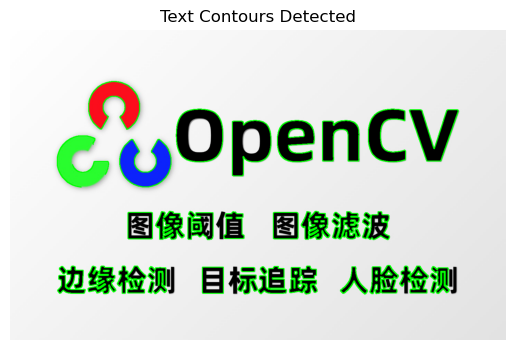

In [94]:
# 显示结果  
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))  
plt.axis('off')  
plt.title('Text Contours Detected')  
plt.show()  
  